**Connect google drive**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 1906202014581900_267686_1.jpg
 1st_2nd_semester_result.pdf
 9169064025-1.pdf
 ALL_SEMESTERS_MARKSHEET.pdf
'Colab Notebooks'
' GATE_2021_SCORECARD (1).pdf'
' GATE_2021_SCORECARD.pdf'
'Getting started.pdf'
'https:  ims.iiit.ac.in do.php?UBEeaAuCOhrvEDTJTIn8w IgCJ7wjiu4LF4yfZUjIgBjx234YMGDWd6wu87uzdu497e2y3++9PFfcAWqVsFPbvB+IvvIxN4Bj57R8Jp6sD+5xt49QsE0x6s4QMwdEoif.pdf'
'hussnain-ashraf2020-10-01 14_34_09.pdf'
 Hussnain_placement_resume.pdf
'Lord of the Rings-converted (1).gslides'
'Lord of the Rings-converted.gslides'
'Lord of the Rings.pdf'
'MT2021055 (1).pdf'
 MT2021055.jpeg
 MT2021055_NEW.pdf
 MT2021055.pdf
'My Drive'
'New Doc 2019-12-29 13.28.35 - Page 1 (1).pdf'
'New Doc 2019-12-29 13.28.35 - Page 1.pdf'
'New Doc 2019-12-29 13.28.35 - Page 5.pdf'
'New Doc 2021-04-06 21.00.31.pdf'
'New Doc 2021-04-06 23.35.57.pdf'
 Report.gdoc
 yolov3
 yolo_wwww


**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.02 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_tra/content/drive/MyDrive/testining.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/content/gdrive/MyDrive/yolo_small_data"

In [ ]:
!echo "Auto" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/gdrive/MyDrive/yolo_small_data' > data/obj.data
!mkdir data/obj

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-03-28 08:22:32--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  63.2MB/s    in 2.5s    

2022-03-28 08:22:34 (63.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /content/gdrive/MyDrive/yolov3/train_auto.zip -d data/obj

Archive:  /content/gdrive/MyDrive/yolov3/train_auto.zip
   creating: data/obj/train/
  inflating: data/obj/train/Datacluster-Auto--95-_jpg.rf.934ee9dba67575a4b9ca59a6a8940d0b.txt  
  inflating: data/obj/train/Datacluster-Auto--95-_jpg.rf.934ee9dba67575a4b9ca59a6a8940d0b.jpg  
  inflating: data/obj/train/Datacluster-Auto--95-_jpg.rf.7d900fa6a86a3d3d2f083ed52750371a.txt  
  inflating: data/obj/train/Datacluster-Auto--95-_jpg.rf.7d900fa6a86a3d3d2f083ed52750371a.jpg  
  inflating: data/obj/train/Datacluster-Auto--95-_jpg.rf.63047d63015adf020b7d171b1d3cf226.txt  
  inflating: data/obj/train/Datacluster-Auto--95-_jpg.rf.63047d63015adf020b7d171b1d3cf226.jpg  
  inflating: data/obj/train/Datacluster-Auto--9-_jpg.rf.f1d359bb70ea669ce6ee49e6945c960a.txt  
  inflating: data/obj/train/Datacluster-Auto--9-_jpg.rf.f1d359bb70ea669ce6ee49e6945c960a.jpg  
  inflating: data/obj/train/Datacluster-Auto--9-_jpg.rf.77cc012d553df06be13954e8cd258a59.txt  
  inflating: data/obj/train/Datacluster-Auto--9-_jpg.r

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, 
#it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/train/*.txt")
print(txt_file_paths)
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

['data/obj/train/Datacluster-Auto--44-_jpg.rf.bac80ac5c7bf4b3c3829f97984151b61.txt', 'data/obj/train/Datacluster-Auto--30-_jpg.rf.909fada901c9faef3bae533d51e9c911.txt', 'data/obj/train/Datacluster-Auto--67-_jpg.rf.6b814179f68ab458a6bebcf96ea7e250.txt', 'data/obj/train/Datacluster-Auto--129-_jpg.rf.3b4d68dfa7e10a083944f15b1178b8e7.txt', 'data/obj/train/Datacluster-Auto--9-_jpg.rf.41b2eb903ec45e3d53f2cfb100c10ce6.txt', 'data/obj/train/Datacluster-Auto--129-_jpg.rf.bb339fcadf4ac23780c6c454d8a04c2c.txt', 'data/obj/train/Datacluster-Auto--67-_jpg.rf.493d033ca0d175052c179dd6cc44556e.txt', 'data/obj/train/Datacluster-Auto--9-_jpg.rf.77cc012d553df06be13954e8cd258a59.txt', 'data/obj/train/Datacluster-Auto--126-_jpg.rf.66ab6911e2e611b4ae4876e66a48015c.txt', 'data/obj/train/Datacluster-Auto--145-_jpg.rf.2daed496c2f6a128a83dd427deb66f67.txt', 'data/obj/train/Datacluster-Auto--131-_jpg.rf.2ede4b90289b71142790c41200aa7ab8.txt', 'data/obj/train/Datacluster-Auto--30-_jpg.rf.8ff6214d2ac7cfde0d76b6dcacc

In [ ]:
import glob
images_list = glob.glob("data/obj/train/*.jpg")
print(images_list)

['data/obj/train/Datacluster-Auto--131-_jpg.rf.2ede4b90289b71142790c41200aa7ab8.jpg', 'data/obj/train/Datacluster-Auto--151-_jpg.rf.de54590538268f337fa4b0b41487e16f.jpg', 'data/obj/train/Datacluster-Auto--112-_jpg.rf.6236a1564b3dcc8d25486fb65e6f0391.jpg', 'data/obj/train/Datacluster-Auto--67-_jpg.rf.493d033ca0d175052c179dd6cc44556e.jpg', 'data/obj/train/Datacluster-Auto--88-_jpg.rf.a215eb6e4e1044e62d462e3cb597721f.jpg', 'data/obj/train/Datacluster-Auto--45-_jpg.rf.ec7d36b53e25bd3ee2cde29ddc591bd1.jpg', 'data/obj/train/Datacluster-Auto--129-_jpg.rf.3b4d68dfa7e10a083944f15b1178b8e7.jpg', 'data/obj/train/Datacluster-Auto--88-_jpg.rf.a16a661f223e285d5ff57d1acf3296b5.jpg', 'data/obj/train/Datacluster-Auto--118-_jpg.rf.690481679e407413fcc49c5bfe786c38.jpg', 'data/obj/train/Datacluster-Auto--95-_jpg.rf.63047d63015adf020b7d171b1d3cf226.jpg', 'data/obj/train/Datacluster-Auto--95-_jpg.rf.934ee9dba67575a4b9ca59a6a8940d0b.jpg', 'data/obj/train/Datacluster-Auto--118-_jpg.rf.2b84796cce62eef2ae32829d

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -epochs 400

CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Mar 28 2022 - 08:19:46 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


##OBJECT DETECTION NOW --------------------------------


In [ ]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow
# cv2_imshow(img)

In [ ]:
# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/MyDrive/yolo_wwww/yolov3_training_last.weights", "/content/gdrive/MyDrive/yolo_wwww/yolov3_testing.cfg")

# Name custom object
classes = ["auto"]

# Images path
images_path = glob.glob(r"/content/abc.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

()


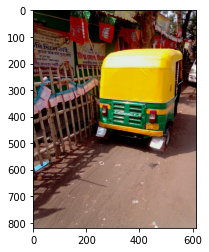

In [ ]:
# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images/content/drive/MyDrive/test
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


    #plt.imshow("Image", img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    # key = cv2.waitKey(0)

cv2.destroyAllWindows()